<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd
import numpy as np

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [4]:
df.columns.to_list()

['Respondent',
 'MainBranch',
 'Hobbyist',
 'OpenSourcer',
 'OpenSource',
 'Employment',
 'Country',
 'Student',
 'EdLevel',
 'UndergradMajor',
 'EduOther',
 'OrgSize',
 'DevType',
 'YearsCode',
 'Age1stCode',
 'YearsCodePro',
 'CareerSat',
 'JobSat',
 'MgrIdiot',
 'MgrMoney',
 'MgrWant',
 'JobSeek',
 'LastHireDate',
 'LastInt',
 'FizzBuzz',
 'JobFactors',
 'ResumeUpdate',
 'CurrencySymbol',
 'CurrencyDesc',
 'CompTotal',
 'CompFreq',
 'ConvertedComp',
 'WorkWeekHrs',
 'WorkPlan',
 'WorkChallenge',
 'WorkRemote',
 'WorkLoc',
 'ImpSyn',
 'CodeRev',
 'CodeRevHrs',
 'UnitTests',
 'PurchaseHow',
 'PurchaseWhat',
 'LanguageWorkedWith',
 'LanguageDesireNextYear',
 'DatabaseWorkedWith',
 'DatabaseDesireNextYear',
 'PlatformWorkedWith',
 'PlatformDesireNextYear',
 'WebFrameWorkedWith',
 'WebFrameDesireNextYear',
 'MiscTechWorkedWith',
 'MiscTechDesireNextYear',
 'DevEnviron',
 'OpSys',
 'Containers',
 'BlockchainOrg',
 'BlockchainIs',
 'BetterLife',
 'ITperson',
 'OffOn',
 'SocialMedia',
 'Ext

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [5]:
# your code goes here
df1 = df['ConvertedComp'].value_counts()

In [6]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [7]:
#replace null values with median values
med = df['ConvertedComp'].median()
df['ConvertedComp'].replace(np.nan, med, inplace=True)

Plot the histogram for the column `ConvertedComp`.


In [8]:
# check null values
df['ConvertedComp'].isnull().sum()

0

In [9]:
count, bin_edges = np.histogram(df['ConvertedComp'])
print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[10475   238   115   125    99   131    34    15    15   151]
[      0.  200000.  400000.  600000.  800000. 1000000. 1200000. 1400000.
 1600000. 1800000. 2000000.]


What is the median of the column `ConvertedComp`?


In [10]:
med = df['ConvertedComp'].median()
print(med)

57745.0


In [11]:
df['ConvertedComp'].loc[df['Gender']=='Woman'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [12]:
# your code goes here
df['Gender'].value_counts().sort_index(ascending=True)

Man                                                            10480
Man;Non-binary, genderqueer, or gender non-conforming             26
Non-binary, genderqueer, or gender non-conforming                 63
Woman                                                            731
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Woman;Non-binary, genderqueer, or gender non-conforming           14
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [13]:
# your code goes here
df.loc[df['Gender'] =='Woman'].count(axis=0)

Respondent      731
MainBranch      731
Hobbyist        731
OpenSourcer     731
OpenSource      719
               ... 
Sexuality       682
Ethnicity       692
Dependents      726
SurveyLength    728
SurveyEase      730
Length: 85, dtype: int64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [14]:
# your code goes here
med_age = df['Age'].median()

In [15]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [16]:
df['Age'].isnull().sum()

287

In [17]:
# replace null values with median age
df['Age'].replace(np.nan, med_age, inplace=True)

In [18]:
df['Age'].describe()

count    11398.000000
mean        30.734102
std          7.305317
min         16.000000
25%         26.000000
50%         29.000000
75%         34.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


In [19]:
# your code goes here
count1, bin_edges1 = np.histogram(df['Age'])
print(count1) # frequency count
print(bin_edges1) # bin ranges, default = 10 bins

[2094 5624 2557  842  225   49    6    0    0    1]
[16.  24.3 32.6 40.9 49.2 57.5 65.8 74.1 82.4 90.7 99. ]


## Outliers


In [20]:
low_quart_age = df['Age'].quantile(0.25)
df1 = df['Age'].loc[df['Age']<low_quart_age]
df1.value_counts()

25.0    736
24.0    679
23.0    580
22.0    406
21.0    203
20.0    109
19.0     78
18.0     29
17.0      6
16.0      3
24.5      2
22.5      1
Name: Age, dtype: int64

### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


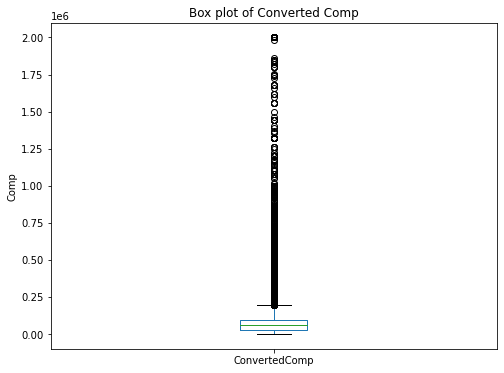

In [21]:
# your code goes here
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt


df['ConvertedComp'].plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Converted Comp')
plt.ylabel('Comp')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [22]:
df['ConvertedComp'].describe()

count    1.139800e+04
mean     1.263096e+05
std      2.846750e+05
min      0.000000e+00
25%      2.901600e+04
50%      5.774500e+04
75%      9.500000e+04
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [23]:
# your code goes here


Find out the upper and lower bounds.


In [24]:
# your code goes here
low_quart = df['ConvertedComp'].quantile(0.25)
high_quart = df['ConvertedComp'].quantile(0.75)
print(df['ConvertedComp'].quantile(0.25))
print(df['ConvertedComp'].quantile(0.75))
print(" interquartile range",high_quart - low_quart)

29016.0
95000.0
 interquartile range 65984.0


Identify how many outliers are there in the `ConvertedComp` column.


In [32]:
# your code goes here
df['ConvertedComp'].loc[(df['ConvertedComp']> high_quart) | (df['ConvertedComp']<low_quart) ].count()

5654

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [26]:
# your code goes here
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['ConvertedComp']))
print(z)

[0.22942809 0.10935959 0.12755307 ... 0.07485909 0.16137909 0.24086269]


In [27]:
new_comp = df['ConvertedComp'].loc[(z <3)&(z>-3)]
print(new_comp.head(5))

0     61000.0
1     95179.0
2     90000.0
3    455352.0
4     65277.0
Name: ConvertedComp, dtype: float64


In [28]:
new_comp.mean()

82046.18364574843

In [29]:
new_comp.describe()

count     11043.000000
mean      82046.183646
std      119608.159045
min           0.000000
25%       27986.000000
50%       57745.000000
75%       90000.000000
max      976176.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [31]:
# your code goes here
df.corr()['Age'].sort_values()

CodeRevHrs      -0.021086
Respondent       0.004282
CompTotal        0.007190
WorkWeekHrs      0.036897
ConvertedComp    0.101777
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
